In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import r2_score

In [313]:
csv_file_path = 'extracted_data/extracted_data_3.4.csv'

df = pd.read_csv(csv_file_path)

df.shape

(291, 102)

In [338]:
X = df.iloc[:, :-2]
y = df.iloc[:, -1:]

# y = y*100

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (232, 100)
X_test shape: (59, 100)
y_train shape: (232, 1)
y_test shape: (59, 1)


In [339]:
# num_features = X_train.shape[1]
# print(num_features)
# num_rows = (num_features + 2) // 4
# num_columns = min(num_features, 4)

# fig, axes = plt.subplots(num_rows, num_columns, figsize=(10, 10*num_columns))

# axes = axes.flatten()

# for feature_idx in range(num_features):
#     ax = axes[feature_idx]

#     feature_name = X_train.columns[feature_idx]  # Assuming X_train is a DataFrame
#     ax.scatter(X_train[feature_name], y_train, label=f'{feature_name}')
#     ax.set_xlabel(f'{feature_name}')
#     ax.set_ylabel('Capacity')
#     ax.set_title(f'Scatter Plot of {feature_name} vs. Capacity')
#     ax.legend()

# plt.tight_layout()

# plt.show()


In [340]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='linear')
])

model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 64)                6464      
                                                                 
 dense_121 (Dense)           (None, 256)               16640     
                                                                 
 dropout_40 (Dropout)        (None, 256)               0         
                                                                 
 dense_122 (Dense)           (None, 64)                16448     
                                                                 
 dense_123 (Dense)           (None, 1)                 65        
                                                                 
Total params: 39617 (154.75 KB)
Trainable params: 39617 (154.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [341]:
model.compile(optimizer='adam', loss=tf.compat.v1.losses.mean_squared_error)

In [342]:
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/500
6/6 - 6s - loss: 0.5249 - val_loss: 0.0967 - 6s/epoch - 1s/step
Epoch 2/500
6/6 - 0s - loss: 0.2343 - val_loss: 0.0714 - 163ms/epoch - 27ms/step
Epoch 3/500
6/6 - 0s - loss: 0.1900 - val_loss: 0.0646 - 259ms/epoch - 43ms/step
Epoch 4/500
6/6 - 0s - loss: 0.1941 - val_loss: 0.0720 - 257ms/epoch - 43ms/step
Epoch 5/500
6/6 - 0s - loss: 0.1841 - val_loss: 0.0671 - 193ms/epoch - 32ms/step
Epoch 6/500
6/6 - 0s - loss: 0.1919 - val_loss: 0.1063 - 138ms/epoch - 23ms/step
Epoch 7/500
6/6 - 0s - loss: 0.1972 - val_loss: 0.0687 - 133ms/epoch - 22ms/step
Epoch 8/500
6/6 - 0s - loss: 0.1902 - val_loss: 0.0738 - 151ms/epoch - 25ms/step
Epoch 9/500
6/6 - 0s - loss: 0.1615 - val_loss: 0.0584 - 229ms/epoch - 38ms/step
Epoch 10/500
6/6 - 0s - loss: 0.1642 - val_loss: 0.0550 - 254ms/epoch - 42ms/step
Epoch 11/500
6/6 - 0s - loss: 0.1664 - val_loss: 0.0571 - 177ms/epoch - 30ms/step
Epoch 12/500
6/6 - 0s - loss: 0.1684 - val_loss: 0.0838 - 198ms/epoch - 33ms/step
Epoch 13/500
6/6 - 0s - loss: 

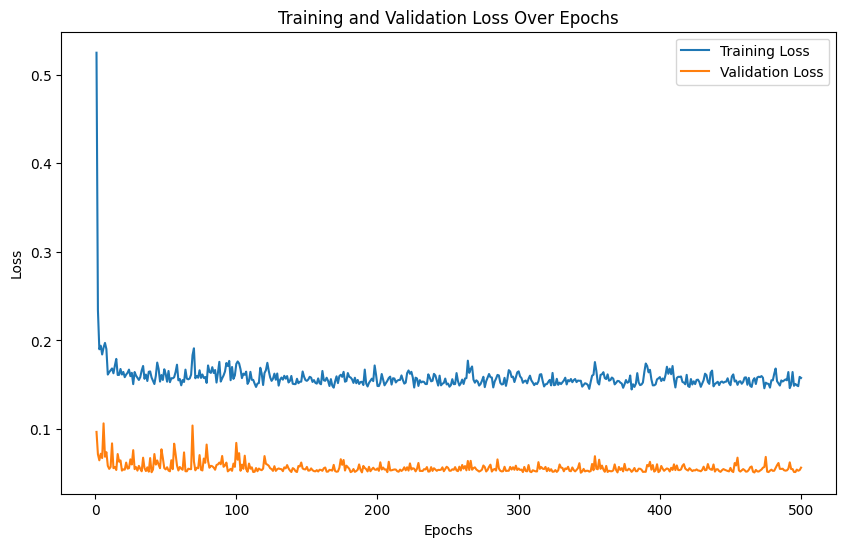

In [343]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = np.arange(1, len(train_loss) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [344]:
# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
accuracy = 1 - loss
print(f"Accuracy: {accuracy}")

2/2 [==============================] - 0s 21ms/step - loss: 0.0276
Test Loss: 0.02764110080897808
Accuracy: 0.9723588991910219


In [345]:
predictions = model.predict(X_test)

r2 = r2_score(y_test, predictions)
print(f"R-squared (R2) Score: {r2}")

2/2 [==============================] - 0s 8ms/step
R-squared (R2) Score: 0.882262076733173


2/2 [==============================] - 0s 13ms/step


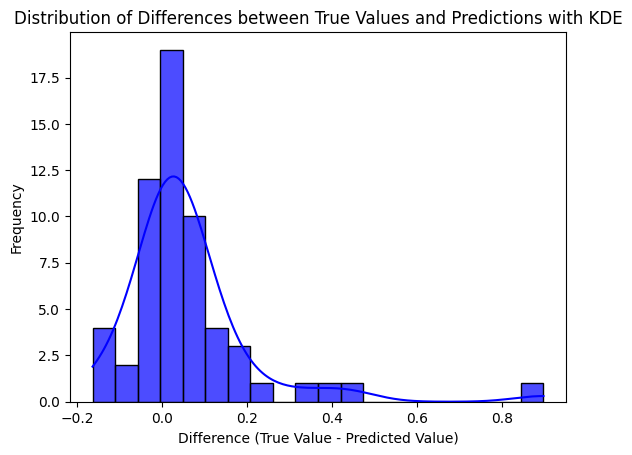

In [350]:
# Assuming y_test is a Pandas DataFrame
y_test_values = y_test.to_numpy().flatten()

# Get model predictions
predictions = model.predict(X_test).flatten()

# Calculate differences
differences = y_test_values - predictions

# Plot histogram with KDE
sns.histplot(differences, bins=20, kde=True, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Difference (True Value - Predicted Value)')
plt.ylabel('Frequency')
plt.title('Distribution of Differences between True Values and Predictions with KDE')
plt.show()


#### Plot actual values vs predictions

2/2 [==============================] - 0s 10ms/step


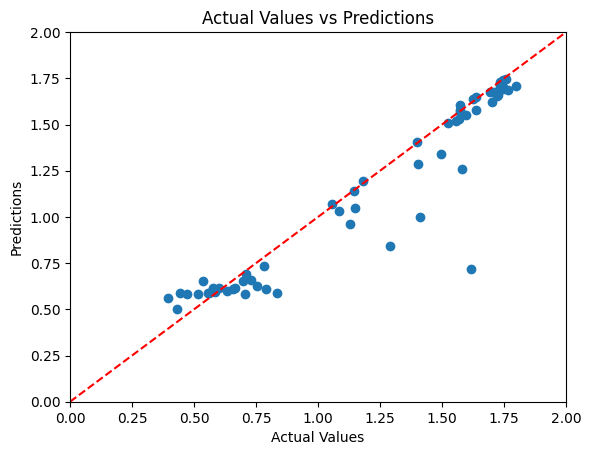

In [348]:

predictions = model.predict(X_test).flatten()
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Actual Values vs Predictions')

plt.xlim(0, 2)
plt.ylim(0, 2)

plt.plot([0,2], [0,2], color='red', linestyle='--', label='Slope 1 Line')

plt.show()